In [79]:
from joblib import load

file_name = 'k5_4hiddenLs8wMax12dropoutRateNone'

file_joblib = file_name + '.joblib'
plot_name = file_name + '.png'

NNet_prediction_list, used_hyperparameter_dict, country_list, pred_year_string = load(file_joblib) #

In [80]:
used_hyperparameter_dict

{'s': 8,
 'k': 5,
 'wMax': 12,
 'relValidationSize': 0.4,
 'conflictTrapThresh': 5,
 'features': 'wdi',
 'earlyStoppingPatience': 3,
 'learningRate': 0.1,
 'numberHiddenLayers': '4',
 'dropoutRate': 'None',
 'numberNeurons': 'neuronshiddenlayer'}

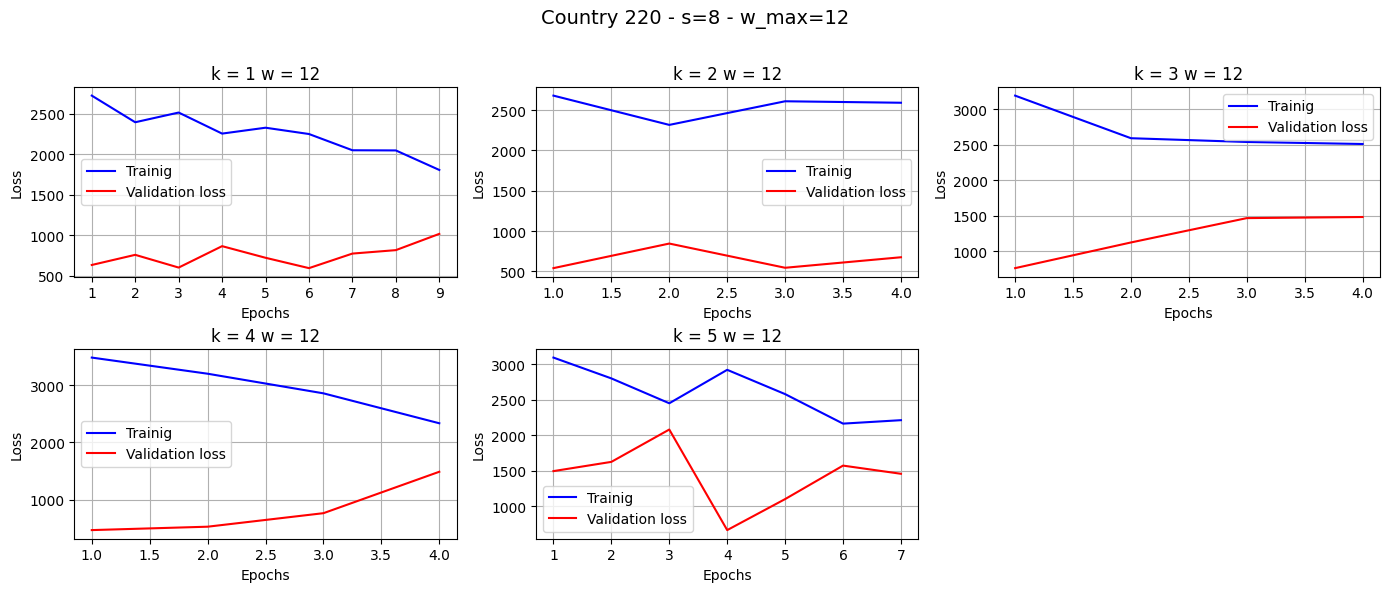

In [93]:
country_to_plot = 220  #222 60 223
country_index = country_list.index(country_to_plot)

w_max = used_hyperparameter_dict['wMax']
k_max = used_hyperparameter_dict['k']

import numpy as np
import matplotlib.pyplot as plt
i = 0 #zeile
j = 0 #spalte
# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

title_string = 'Country ' + str(NNet_prediction_list[country_index]['country_id']) + ' - s=' + str(NNet_prediction_list[country_index][pred_year_string][0]['s']) + ' - w_max=' + str(w_max)

for k in range(0, k_max):
    loss = NNet_prediction_list[country_index][pred_year_string][0]['loss'][k]
    val_loss = NNet_prediction_list[country_index][pred_year_string][0]['val_loss'][k]
    epochs = NNet_prediction_list[country_index][pred_year_string][0]['epochs'][k]
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation loss')
    axes[i][j].set_title('k = ' + str(k+1) + ' w = ' + str(NNet_prediction_list[country_index][pred_year_string][0]['w'][k]))
    axes[i][j].set_xlabel('Epochs')
    axes[i][j].set_ylabel('Loss')
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 2:
        i += 1
        j = 0
    else:  
        j += 1

axes[1, 2].axis('off')  # Schalte Achsen für leere Plots aus

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=14)
plt.show()

In [84]:
for country_data in NNet_prediction_list:
    for k in range(0,k_max):
        loss = country_data[pred_year_string][0]['loss'][k]
        val_loss = country_data[pred_year_string][0]['val_loss'][k]

        if val_loss > loss:
            print(str(country_data['country_id']) + ' k=' + str(k))

47 k=0
47 k=1
47 k=2
47 k=3
47 k=4
50 k=0
50 k=1
50 k=2
50 k=3
50 k=4
60 k=0
60 k=1
60 k=2
60 k=3
60 k=4
62 k=0
62 k=1
62 k=2
62 k=3
62 k=4
69 k=0
69 k=1
69 k=2
69 k=3
69 k=4
70 k=0
70 k=1
70 k=2
70 k=3
70 k=4
78 k=0
78 k=1
78 k=2
78 k=3
78 k=4
79 k=0
79 k=1
79 k=2
79 k=3
79 k=4
104 k=0
104 k=1
104 k=2
104 k=3
104 k=4
105 k=0
105 k=1
105 k=2
105 k=3
105 k=4
117 k=2
120 k=0
120 k=1
120 k=2
120 k=3
120 k=4
124 k=0
124 k=1
124 k=2
124 k=3
124 k=4
125 k=4
128 k=0
128 k=1
128 k=2
128 k=3
128 k=4
131 k=0
131 k=1
131 k=2
131 k=3
131 k=4
132 k=0
132 k=1
132 k=2
132 k=3
132 k=4
133 k=0
133 k=1
133 k=2
133 k=3
133 k=4
136 k=0
136 k=1
136 k=2
136 k=3
136 k=4
145 k=0
145 k=1
145 k=2
145 k=3
145 k=4
162 k=4
167 k=0
167 k=1
167 k=2
167 k=3
167 k=4
199 k=0
199 k=1
199 k=2
199 k=3
199 k=4
213 k=4
218 k=0
218 k=1
218 k=2
218 k=3
218 k=4
222 k=0
222 k=1
222 k=2
222 k=3
222 k=4
244 k=0
244 k=1
244 k=2
244 k=3
244 k=4


In [61]:
crps_values_valid = []
for country_data in NNet_prediction_list:
    country_crps_list = []
    for k in range(0,k_max):
        country_crps_list.append(min(country_data[pred_year_string][0]['val_loss'][k])) # min because of early stopping 'restore_best_weights=True'
    crps_values_valid.append(np.mean(country_crps_list))

mean_crps_valid = np.mean(crps_values_valid)


crps_values_test = []
for country_data in NNet_prediction_list:
    country_crps_list = []
    for k in range(0,k_max):
        country_crps_list.append(country_data[pred_year_string][0]['CRPS'][k])
    crps_values_test.append(np.mean(country_crps_list))

mean_crps_test = np.mean(crps_values_test)




print('Mean CRPS validate = ' + str(mean_crps_valid) + ' \\'+'\\')
print('Mean CRPS test = ' + str(mean_crps_test) + ' \\'+'\\')
print('Parameters data prep: ' + ' \\'+'\\' + 'wMax='+ str(used_hyperparameter_dict['wMax']) + ' validationSize='+str(used_hyperparameter_dict['relValidationSize']) + ' conflictTrapThresh=' + str(used_hyperparameter_dict['conflictTrapThresh']) + ' features='+ used_hyperparameter_dict['features'] + ' \\'+'\\')
print('Parameters NN: ' + ' \\'+'\\' + 'stoppingPatience=' + str(used_hyperparameter_dict['earlyStoppingPatience']) + ' learningRate='+str(used_hyperparameter_dict['learningRate'])+' numberHiddenLayers=' + used_hyperparameter_dict['numberHiddenLayers'] + ' numberNeurons=' + used_hyperparameter_dict['numberNeurons'] + ' dropoutRate=' + str(used_hyperparameter_dict['dropoutRate']))
print('')

Mean CRPS validate = 32.21352320882145 \\
Mean CRPS test = 122.81565425531909 \\
Parameters data prep:  \\wMax=6 validationSize=0.4 conflictTrapThresh=5 features=wdi \\
Parameters NN:  \\stoppingPatience=3 learningRate=0.1 numberHiddenLayers=6 numberNeurons=neuronshiddenlayer dropoutRate=None



In [ ]:
# Verzeichnis festlegen
save_directory = '/pfad/zum/verzeichnis/'

# Dateiname festlegen
file_name = 'mein_plot.png'

# Plot speichern
plt.savefig(save_directory + file_name)

# Plot anzeigen (optional)
plt.show()